In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns

In [2]:
#print os.listdir(os.getcwd())

In [3]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [6]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [7]:
train.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [8]:
print  (train.shape)
print (test.shape)

(213451, 16)
(62096, 15)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [11]:
print ('training dataset ({} rows) null value:\n'.format(train.shape[0]))
print (train.isnull().sum(axis = 0))
print ('\n' + '***' * 10 + '\n')
print ('test dataset ({} rows) null value:\n'.format(test.shape[0]))
print (test.isnull().sum(axis = 0))

training dataset (213451 rows) null value:

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

******************************

test dataset (62096 rows) null value:

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel             

In [12]:
train_features = train.columns
test_features = test.columns

np.setdiff1d(train_features, test_features)

array(['country_destination'], dtype=object)

# Explore each feature 

# date_account_created 

In [13]:
dac_train = train.date_account_created.value_counts()
dac_test = test.date_account_created.value_counts()

In [14]:
dac_test

2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
2014-07-21     888
2014-08-27     872
2014-08-26     841
2014-07-29     816
2014-08-06     790
2014-07-30     786
2014-08-12     785
2014-08-11     781
2014-08-05     772
2014-08-28     772
2014-07-28     764
2014-07-16     757
2014-07-25     754
2014-09-16     751
2014-07-31     751
2014-08-14     742
2014-08-19     741
2014-08-07     739
2014-09-10     739
2014-08-08     738
2014-07-20     738
2014-08-13     731
2014-09-03     729
2014-08-04     728
2014-08-25     725
              ... 
2014-08-31     614
2014-09-05     612
2014-09-17     612
2014-08-23     611
2014-07-09     610
2014-08-17     609
2014-07-10     607
2014-08-24     606
2014-09-19     605
2014-08-10     603
2014-09-12     600
2014-07-01     599
2014-09-13     597
2014-09-01     592
2014-08-02     582
2014-09-07     555
2014-09-27     548
2014-09-06     543
2014-09-21     540
2014-09-25     533
2014-09-14     532
2014-09-20  

In [15]:
print ('training dataset:\n')
print (dac_train.describe())
print ('\n' + '***' * 10 + '\n')
print ('test dataset:\n')
print (dac_test.describe())

training dataset:

count    1634.000000
mean      130.630967
std       139.327895
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       674.000000
Name: date_account_created, dtype: float64

******************************

test dataset:

count      92.000000
mean      674.956522
std       122.568116
min       401.000000
25%       606.750000
50%       662.000000
75%       739.000000
max      1105.000000
Name: date_account_created, dtype: float64


In [17]:
print ("training dataset: \n")
print (dac_train.head(5))
print (dac_train.tail(5))

print ("\n\ntest dataset: \n")
print (dac_test.head(5))
print (dac_test.tail(5))

training dataset: 

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
Name: date_account_created, dtype: int64
2010-01-31    1
2010-01-08    1
2010-04-24    1
2010-03-09    1
2010-01-03    1
Name: date_account_created, dtype: int64


test dataset: 

2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
Name: date_account_created, dtype: int64
2014-07-06    475
2014-07-12    472
2014-07-04    445
2014-07-05    421
2014-07-13    401
Name: date_account_created, dtype: int64


In [19]:
# find out the datetime information for date_account_created
dac_train_date = pd.to_datetime(dac_train.index)

print ("the start date of training dataset is: {}".format(dac_train_date.min()))
print ("the end date of training dataset is: {}\n".format(dac_train_date.max()))

dac_test_date = pd.to_datetime(dac_test.index)

print ("the start date of test dataset is: {}".format(dac_test_date.min()))
print ("the end date of test dataset is: {}".format(dac_test_date.max()))


the start date of training dataset is: 2010-01-01 00:00:00
the end date of training dataset is: 2014-06-30 00:00:00

the start date of test dataset is: 2014-07-01 00:00:00
the end date of test dataset is: 2014-09-30 00:00:00


In [20]:
# find how many days between the first date in record and the account created date

dac_train_day = dac_train_date - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()

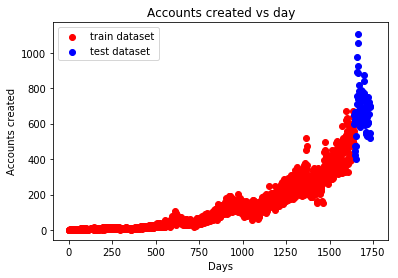

In [21]:
plt.scatter(dac_train_day.days, dac_train.values, color = 'r', label = 'train dataset')
plt.scatter(dac_test_day.days, dac_test.values, color = 'b', label = 'test dataset')

plt.title("Accounts created vs day")
plt.xlabel("Days")
plt.ylabel("Accounts created")
plt.legend(loc = 'upper left')

In [23]:
# record the first date:
start_date = dac_train_date.min()
print (start_date)

2010-01-01 00:00:00


# timestamp_first_active

In [11]:
tfa_train = train.timestamp_first_active.value_counts()
tfa_test = test.timestamp_first_active.value_counts()

print ("training dataset: \n")
print (tfa_train.unique())

print ("\n\ntest dataset: \n")
print (tfa_test.unique())

training dataset: 

[1]


test dataset: 

[1]


In [9]:
# note the timestamp_first_active include the information of year, month, day, hr, min and sec. 
print (train.timestamp_first_active.head(5))

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64


In [29]:
tfa_train_dt = train.timestamp_first_active.astype(str).apply(lambda x:  
                                                                    datetime.datetime(int(x[:4]),
                                                                                      int(x[4:6]), 
                                                                                      int(x[6:8]), 
                                                                                      int(x[8:10]), 
                                                                                      int(x[10:12]),
                                                                                      int(x[12:])))

tfa_test_dt = test.timestamp_first_active.astype(str).apply(lambda x:  
                                                                    datetime.datetime(int(x[:4]),
                                                                                      int(x[4:6]), 
                                                                                      int(x[6:8]), 
                                                                                      int(x[8:10]), 
                                                                                      int(x[10:12]),
                                                                                      int(x[12:])))


In [30]:
tfa_train_dt.describe()

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

# date_first_booking

In [31]:
dfb_train = train.date_first_booking
dfb_test = test.date_first_booking

In [32]:
dfb_train.describe()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

In [33]:
dfb_test.unique()

array([ nan])

The date_first_booking feature for test dataset are all nan. We can drop this feature when building the model.

# Age

In [34]:
# note age column has some unphysical values

print (train[train.age < 15].age.shape)

print (train[train.age > 80].age.shape)

print (test[test.age < 15].age.shape)

print (test[test.age > 80].age.shape)

(57,)
(2771,)
(2,)
(417,)


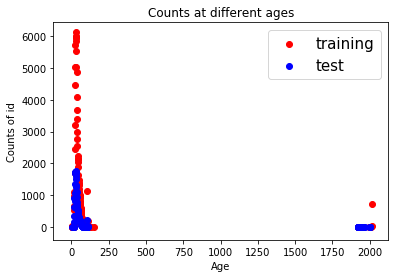

In [35]:
plt.scatter(train.age.value_counts().index.values, train.age.value_counts().values, color = 'r', label = 'training')
plt.scatter(test.age.value_counts().index.values, test.age.value_counts().values, color = 'b', label = 'test')

plt.title("Counts at different ages")
plt.xlabel("Age")
plt.ylabel("Counts of id")
plt.legend(loc = 'upper right', fontsize = 15)

In [36]:
# divide the age column into four parts: missing values, too small age, reasonable age, too large age
age_train =[train[train.age.isnull()].age.shape[0],
            train.query('age < 15').age.shape[0],
            train.query("age >= 15 & age <= 80").age.shape[0],
            train.query('age > 80').age.shape[0]]

age_test = [test[test.age.isnull()].age.shape[0],
            test.query('age < 15').age.shape[0],
            test.query("age >= 15 & age <= 80").age.shape[0],
            test.query('age > 80').age.shape[0]]

columns = ['Null', 'age < 15', 'ReasonableAge', 'age > 80']

Text(0,0.5,'counts')

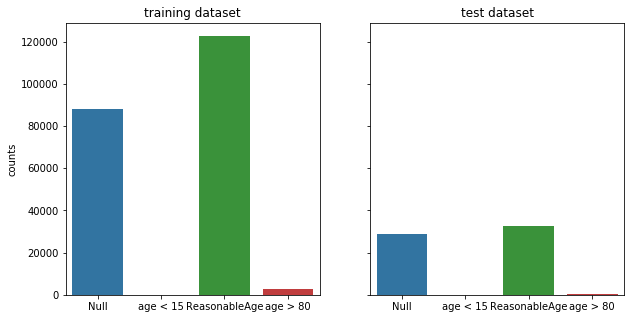

In [37]:
# plot

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey = True,figsize=(10,5))

sns.barplot(columns, age_train, ax = ax1)
sns.barplot(columns, age_test, ax = ax2)

ax1.set_title('training dataset')
ax2.set_title('test dataset')
ax1.set_ylabel('counts')

# One-hot-encoding features: gender, signup_method, etc...

In [38]:
# those features have few labels. We can one hot encoding these features in future feature engineering.
# let us first do a barplot on those features

ohe_feats = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

In [39]:
def feature_barplot(feature, df_train = train, df_test = test, figsize=(10,5), rot = 90, saveimg = False):
    
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    
    fig_feature, (axis1,axis2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)

    sns.barplot(feat_train.index.values, feat_train.values, ax = axis1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = axis2)
    
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis2.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)

    axis1.set_title(feature + ' of training dataset')
    axis2.set_title(feature + ' of test dataset')
    axis1.set_ylabel('Counts')
    
    plt.tight_layout()
    
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)


# gender

In [40]:
train.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [41]:
test.gender.value_counts()

-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64

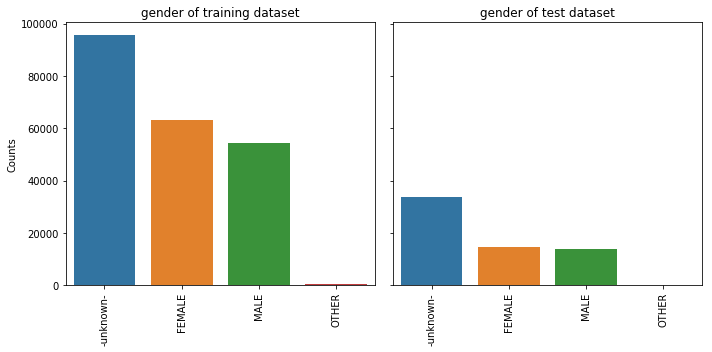

In [42]:
feature_barplot('gender', saveimg = True)

# signup_method

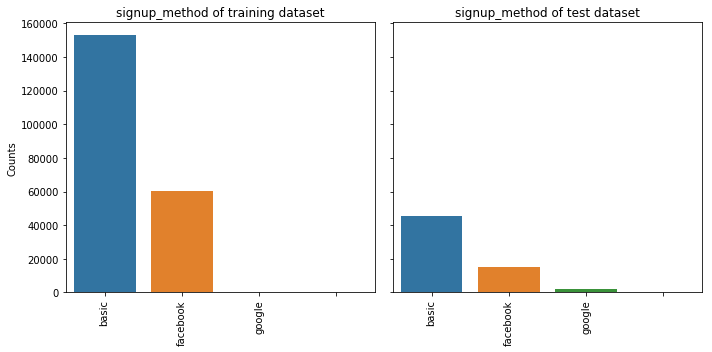

In [43]:
feature_barplot('signup_method')

# Barplot for all the ohe_features

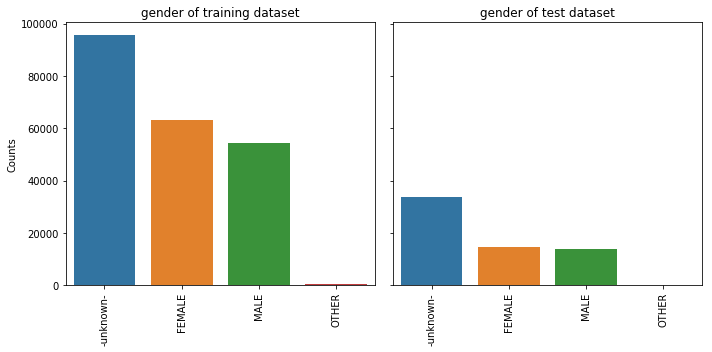

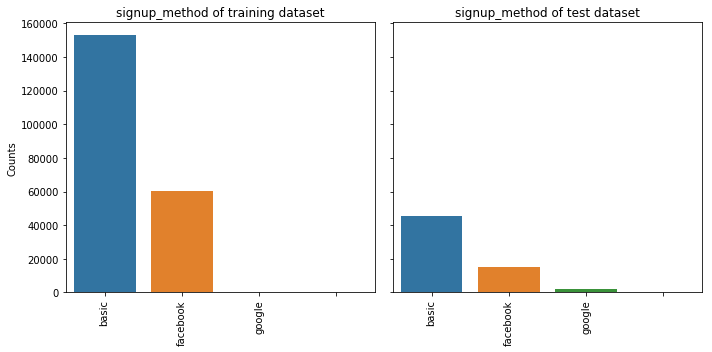

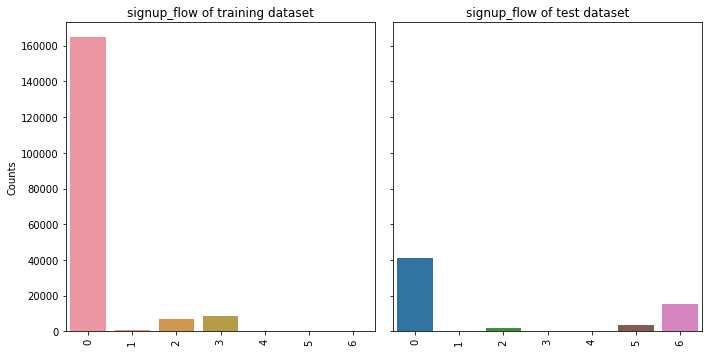

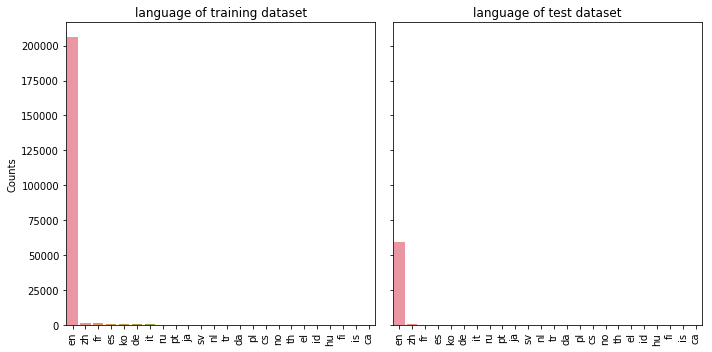

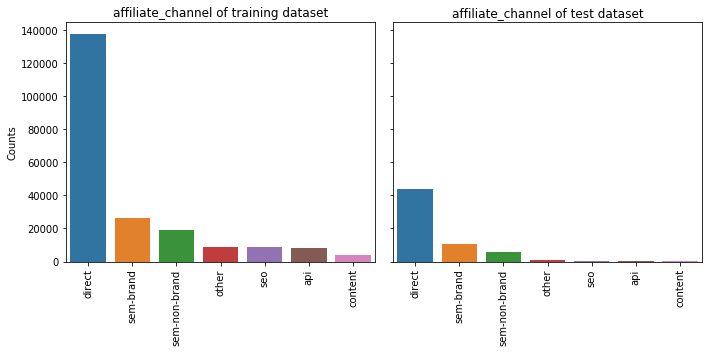

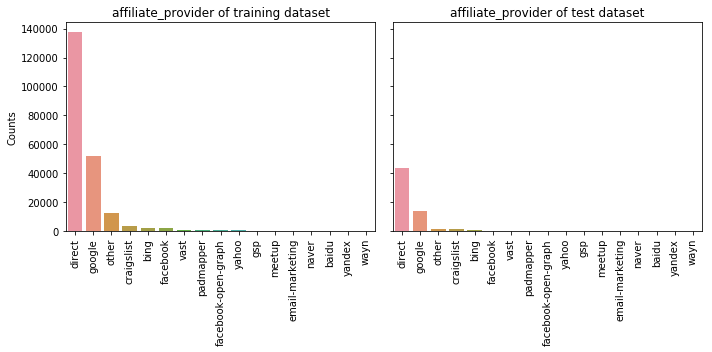

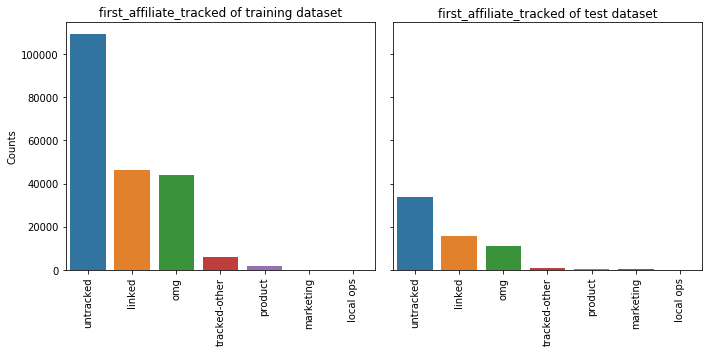

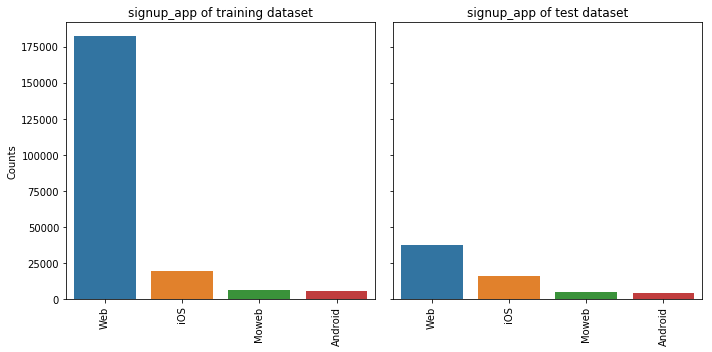

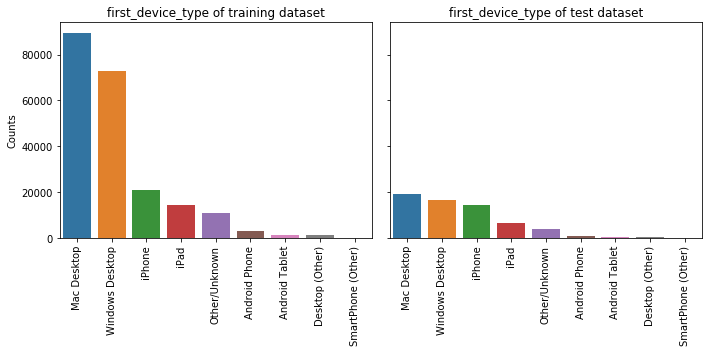

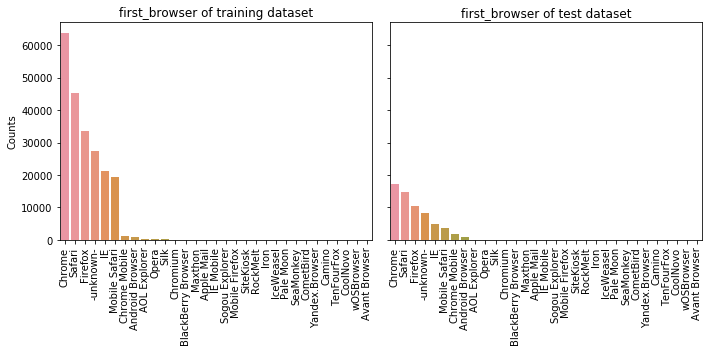

In [44]:
for feat in ohe_feats:
    feature_barplot(feature = feat)

# first_affiliate_tracked: missing value inside

In [45]:
# Be careful that this feature has missing values. 
# Need to treat more carefully. We can replace the missing values with 

train.first_affiliate_tracked.isnull().sum()

6065

In [46]:
test.first_affiliate_tracked.isnull().sum()

20

when perform one hot encoding, set dummy_na = True